# Pymaceuticals Inc.
---

### Analysis

--

Summary Statistics Table (mean, median, var, std, sem)

 1. Drug Regimen Performance:

The table displays different drug regimens as rows and corresponding summary statistics as columns.
The "mean" column represents the average tumor volume across all mice for each drug regimen.
The "median" column represents the middle value of tumor volume, which is a measure of central tendency that's not affected by extreme values.
The "var" column represents the variance of tumor volume, which indicates the spread or variability of data points around the mean.
The "std" column represents the standard deviation of tumor volume, which quantifies how much the data points deviate from the mean.
The "sem" column represents the standard error of the mean, which measures the precision of the mean estimate and indicates how much the sample mean might differ from the population mean.

2. Drug Regimen Comparison:

The table allows for a quick comparison of different drug regimens based on their average tumor volume ("mean" column).
Drugs with lower average tumor volume are potentially more effective in reducing tumor size, while drugs with higher average tumor volume might be less effective.

3. Variability and Precision:

The "var" and "std" columns provide insights into the spread or dispersion of tumor volume measurements within each drug regimen.
Higher variance and standard deviation suggest greater variability, while lower values indicate more consistent results.

4. Standard Error:

The "sem" column informs us about the precision of the mean estimate. Smaller standard errors indicate more reliable and precise mean estimates.
Based on this table, we can observe how each drug regimen performs concerning tumor volume measurements. Further analysis can be conducted to determine which drug regimen shows the most promising results in reducing tumor size for SCC.

Quartiles, Outliers and Boxplots (timepoint regimen)

The second table presents data at the individual mouse level, showing tumor volume measurements and other relevant information at different timepoints under the Capomulin drug regimen. Here's a breakdown of the analysis:

1. Mouse-Specific Data:

Each row represents a different mouse ("Mouse ID") in the study, and the corresponding columns provide detailed information about the mouse's characteristics and treatment response.
"Timepoint" indicates the time in days at which the tumor volume and metastatic sites were measured.
"Sex" provides the gender of the mouse.
"Age_months" represents the age of the mouse in months.
"Weight (g)" indicates the weight of the mouse in grams at the start of the study.

2. Tumor Volume and Metastatic Sites:

"Tumor Volume (mm3)" shows the measured size of the tumor in cubic millimeters at each timepoint.
"Metastatic Sites" indicates the number of sites where the tumor has spread or metastasized.

3. Tumor Volume Average:

The "Tumor Volume (mm3)_average" column provides the average tumor volume for each mouse across all timepoints.

4. Timepoint Analysis:

This table allows us to track how tumor volume changes over time for each mouse under the Capomulin drug regimen.
It's possible to plot individual mouse data to visualize tumor volume trends over the 45-day period.

5. Effectiveness of Capomulin:

By examining the "Tumor Volume (mm3)_average" column, we can assess the overall effectiveness of Capomulin in reducing tumor size.
We can also investigate the impact of other factors, such as mouse weight, age, and sex, on tumor volume response.
 
 Overall, this table provides valuable insights into individual mouse responses to Capomulin treatment. Further analysis can be conducted to identify any trends, patterns, or outliers in the data, as well as to compare the treatment efficacy of Capomulin against other drug regimens. The results of this analysis will be essential for the technical report and can inform decision-making for further research and clinical trials.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
merged_data.head()

# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mice_number= merged_data["Mouse ID"].nunique()
print("Number of Mice:", mice_number)

Number of Mice: 249


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice= merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
print("Duplicate mice by ID number and Timepoint:")
duplicate_mice

Duplicate mice by ID number and Timepoint:


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [119]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merged_data.drop_duplicates(subset='Mouse ID', keep='first')
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [7]:
# Checking the number of mice in the clean DataFrame.
new_mice_number= cleaned_df["Mouse ID"].nunique()
print("Number of Mice:", new_mice_number)

Number of Mice: 249


## Summary Statistics

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_df = merged_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']).reset_index()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_df.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median':'Median Tumor Volume',
    'var': 'Variance Tumor Volume',
    'std': 'Standard Deviation Tumor Volume',
    'sem': 'SEM Tumor Volume' }, inplace=True)

summary_df

,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_df = merged_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']).reset_index()
summary_df

,Drug Regimen,mean,median,var,std,sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

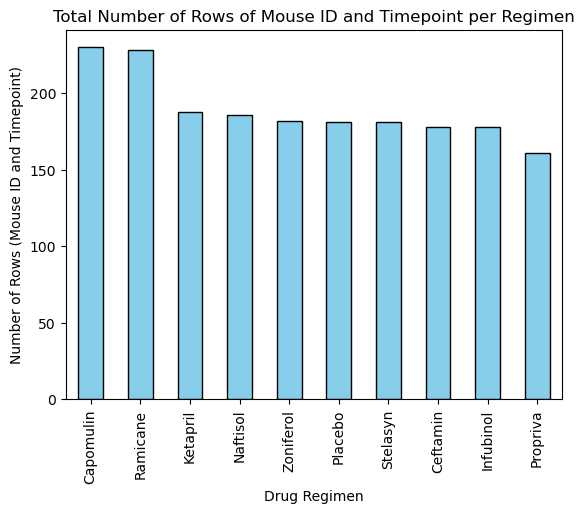

In [25]:
# Generate a bar plot showing the total number of rows of Mouse ID and Timepoint for each drug regimen using Pandas.
total_rows= merged_data.groupby('Drug Regimen').size()
total_rows_sorted= total_rows.sort_values(ascending=False)
total_rows_sorted.plot(kind='bar', color='skyblue',edgecolor='black')

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows (Mouse ID and Timepoint)')
plt.title('Total Number of Rows of Mouse ID and Timepoint per Regimen')
plt.show()

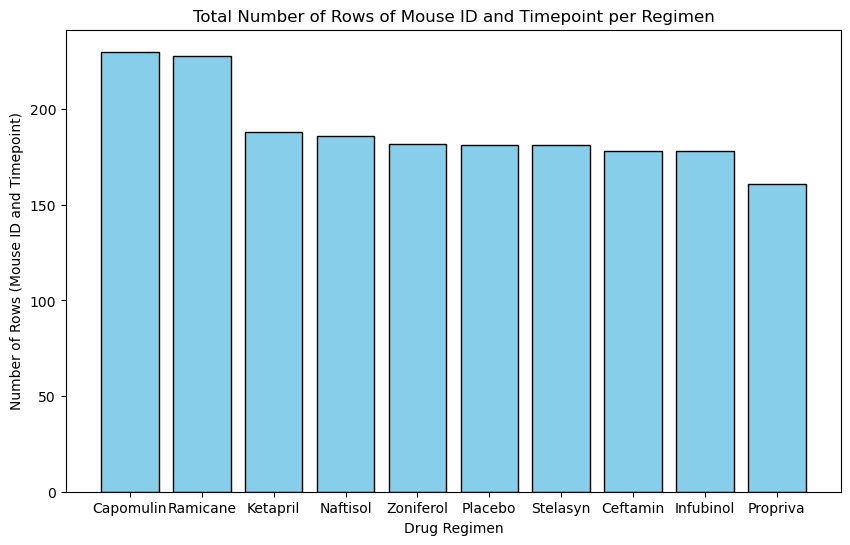

In [52]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Calculate the total number of rows (Mouse ID and Timepoint) for each drug regimen
total_rowspy = merged_data.groupby('Drug Regimen').size()
# Sort the total_rows Series in descending order
total_rowspy_sorted= total_rowspy.sort_values(ascending=False)

#Generate a bar plot using pyplot
plt.figure(figsize=(10, 6)) 
plt.bar(total_rowspy_sorted.index, total_rowspy_sorted.values, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows (Mouse ID and Timepoint)')
plt.title('Total Number of Rows of Mouse ID and Timepoint per Regimen')

plt.show()

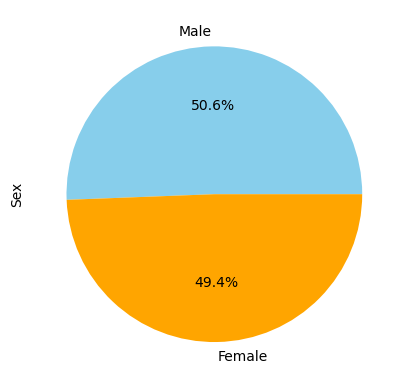

In [44]:
# Generate a pie plot showing the distribution(percentage) of female versus male mice using Pandas
gender_counts = merged_data['Sex'].value_counts()
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'orange'])

plt.show()

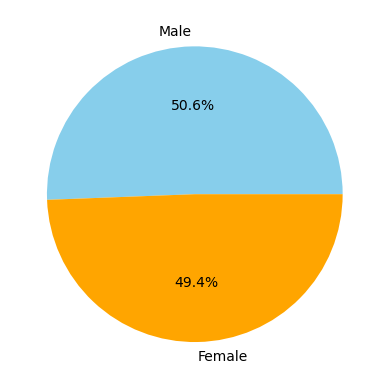

In [54]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male_count= len(merged_data[merged_data['Sex'] == 'Male'])
female_count= len(merged_data[merged_data['Sex'] == 'Female'])

counts = [male_count, female_count] 
labels = ['Male', 'Female']

plt.pie(counts, labels=labels, autopct= '%1.1f%%', colors = ['skyblue','orange'])
plt.show()

## Quartiles, Outliers and Boxplots

In [129]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Step 1: Filter data for the specified treatment regimens
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = merged_data[merged_data['Drug Regimen'].isin(treatment_regimens)]

# Step 2: Find the last (greatest) timepoint for each mouse
last_timepoints = filtered_data.groupby('Mouse ID')['Timepoint'].max()

# Step 3: Merge the group DataFrame with the original DataFrame to get the tumor volume at the last timepoint
Total_tumor_volume= pd.merge(last_timepoints, filtered_data, on=['Mouse ID', 'Timepoint'], how= 'inner')
Total_tumor_volume.head(15)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites,Tumor Volume (mm3)_average
0,b128,45,Capomulin,Female,9,22,38.982878,2,38.982878
1,b742,45,Capomulin,Male,7,21,38.939633,0,38.939633
2,f966,20,Capomulin,Male,16,17,30.485985,0,30.485985
3,g288,45,Capomulin,Male,3,19,37.074024,1,37.074024
4,g316,45,Capomulin,Female,22,22,40.159220,2,40.159220
5,i557,45,Capomulin,Female,1,24,47.685963,1,47.685963
6,i738,45,Capomulin,Female,23,20,37.311846,2,37.311846
7,j119,45,Capomulin,Female,7,23,38.125164,1,38.125164
8,j246,35,Capomulin,Female,21,21,38.753265,1,38.753265
9,l509,45,Capomulin,Male,17,21,41.483008,3,41.483008


In [92]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
list_data= []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    mice_drug_volume= merged_data.loc[merged_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # add subset 
    list_data.append(mice_drug_volume)
    
    # Calculate the IQR for the current treatment regimen
    quartiles = mice_drug_volume.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q

    # Determine potential outliers using upper and lower bounds
    lower_bound = lower_q - (1.5 * iqr)
    upper_bound = upper_q + (1.5 * iqr)
    
    # Check for potential outliers and print the results
    potential_outliers = mice_drug_volume[(mice_drug_volume < lower_bound) | (mice_drug_volume > upper_bound)]
    print(f"Potential outliers for {treatment}: {potential_outliers}")
    
    # Determine outliers using upper and lower bounds


Potential outliers for Capomulin: 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ramicane: 9    22.050126
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Infubinol: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


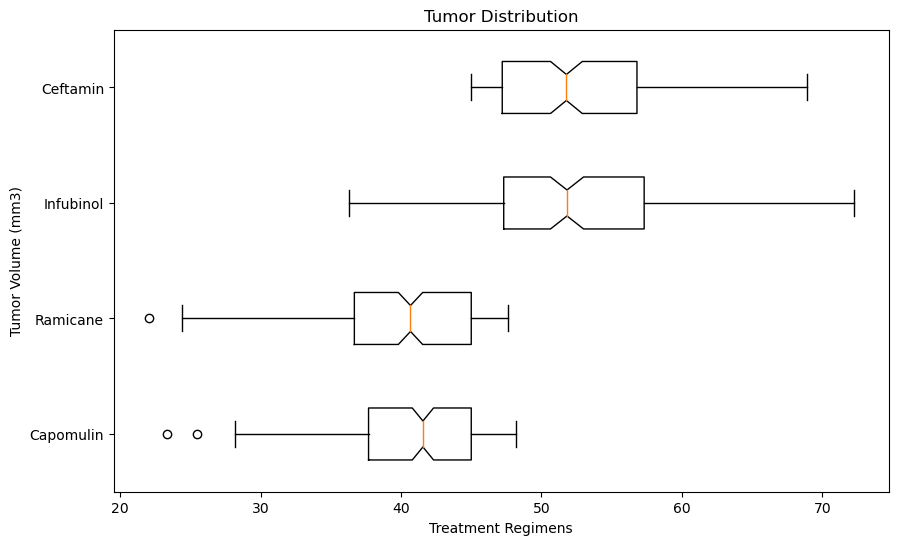

In [103]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
list_data= []

for treatment in treatments:
    mice_drug_volume= merged_data.loc[merged_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)'] 
    list_data.append(mice_drug_volume)
    # add subset
    
    
    
plt.figure(figsize=(10,6))
plt.boxplot(list_data, labels=treatments, notch=True, vert=False)
plt.xlabel('Treatment Regimens')
plt.ylabel('Tumor Volume (mm3)')    
plt.title('Tumor Distribution')
plt.show()

## Line and Scatter Plots

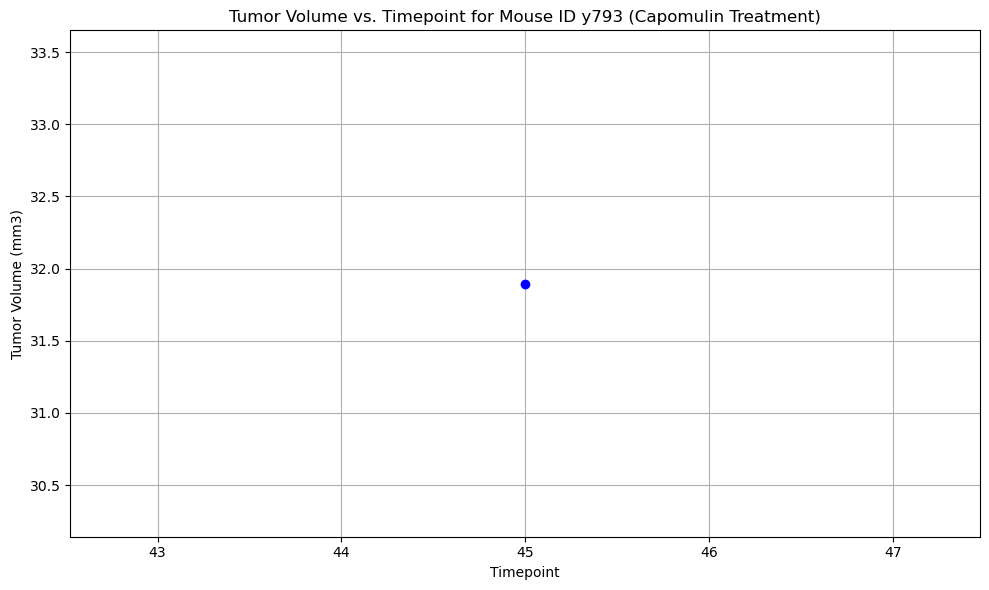

In [106]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


mouse_id= "y793"
mouse_data= Total_tumor_volume[(Total_tumor_volume["Mouse ID"] == mouse_id) & (Total_tumor_volume["Drug Regimen"] == "Capomulin")]
plt.figure(figsize=(10, 6))
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], marker='o', color='b', linestyle='-')

# Add labels and title
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Tumor Volume vs. Timepoint for Mouse ID {mouse_id} (Capomulin Treatment)")

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

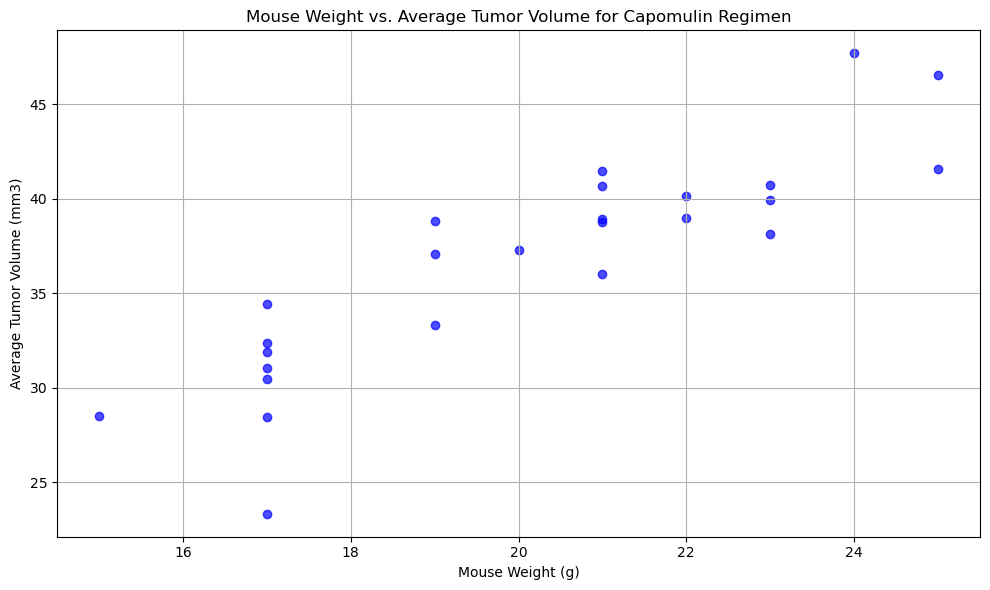

In [108]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = Total_tumor_volume[Total_tumor_volume["Drug Regimen"] == "Capomulin"]

# Group the data by "Mouse ID" to calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().reset_index()

# Merge the average tumor volume data with the original dataset to include mouse weight information
merged_data = pd.merge(capomulin_data, average_tumor_volume, on="Mouse ID", suffixes=("", "_average"))

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_data["Weight (g)"], merged_data["Tumor Volume (mm3)_average"], color='b', alpha=0.7)

# Add labels and title
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()





## Correlation and Regression

Correlation Coefficient: 0.876706040365812


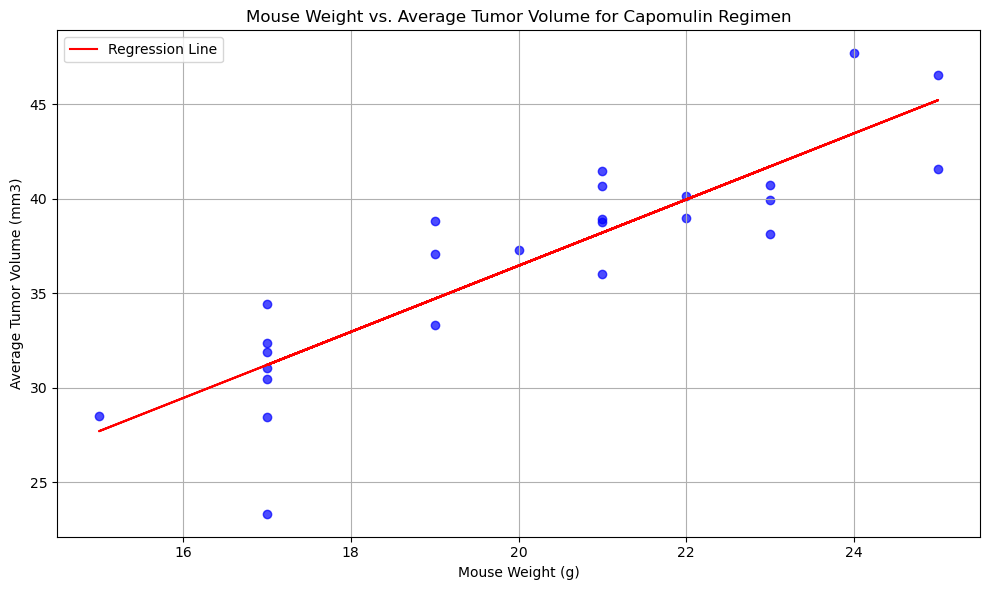

In [112]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Filter the data for the "Capomulin" drug regimen
from scipy.stats import linregress

capomulin_data = Total_tumor_volume[Total_tumor_volume["Drug Regimen"] == "Capomulin"]

# Group the data by "Mouse ID" to calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().reset_index()

# Merge the average tumor volume data with the original dataset to include mouse weight information
merged_data = pd.merge(capomulin_data, average_tumor_volume, on="Mouse ID", suffixes=("", "_average"))

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_data["Weight (g)"], merged_data["Tumor Volume (mm3)_average"], color='b', alpha=0.7)

# Add labels and title
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")

# Calculate the correlation coefficient
correlation_coefficient = merged_data["Weight (g)"].corr(merged_data["Tumor Volume (mm3)_average"])
print("Correlation Coefficient:", correlation_coefficient)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(merged_data["Weight (g)"], merged_data["Tumor Volume (mm3)_average"])

# Create the regression line
regression_line = slope * merged_data["Weight (g)"] + intercept

# Plot the regression line
plt.plot(merged_data["Weight (g)"], regression_line, color='r', label="Regression Line")

# Show the plot with the regression line
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()